# Orthogonal Matrices and Gram-Schmidt

<https://www.youtube.com/watch?v=0MtwqhIwdrI>

from orthogonal vector (basis) $q_{1}, \dots, q_{n}$
to orthogonal matrix $Q$

**if $q_{1}, q_{2}, \dots q_{n}$ are orthonormal vectors,
$q_{i}^{T} q_{j} = 
\begin{cases}
0 & \text{if} \ i \ne j \\ 
1 & \text{if} \ i = j
\end{cases}$**

$Q$ is the matrix (whose col space is) formed by orthonormal vectors

**matrices with orthonormal columns** aka orthonormal matrices

beware that a **orthogonal matrix** that is **both orthonormal and
square**

## why orthonormal is important

and how to transform a matrix $A$ into $Q$ 

$Q^{T} Q = I$

therefore if $Q$ is square (being an orthogonal matrix), it
is invertible, $Q^{T} = Q^{-1}$

### what operation becomes simpler with orthonormal matrix

$Q$ has orthonormal columns

project onto its column space

the projection matrix 
$P = Q (Q^{T} Q)^{-1} Q^{T} = Q \ I \ Q^{T} = Q Q^{T}\\
Q Q^{T} = \begin{cases}
I & \text{if} \ Q \ \text{is square} \\
\\
\end{cases}$

recall the 2 properties of $P$:

- symmetrical
- $P^{2} = P$

therefore the normal equation:

$A^{T}A \hat{x} = A^{T} b$ becomes 

$\hat{x} = Q^{T} b\\
\hat{x}_{i} = q^{T}_{i} b$

## Gram-Schmidt

<https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process>

**how to construct Q from ordinary vectors**

there is a similarity to elimination but the goal is not
making A upper-triangular but orthogonal

example: vectors $a, b$ are indep; they are in an arbitrary dimension
$R^{n}$

I have a matrix

$A = \begin{bmatrix}\\a^{T} & b^{T}\\ \\ \end{bmatrix}$



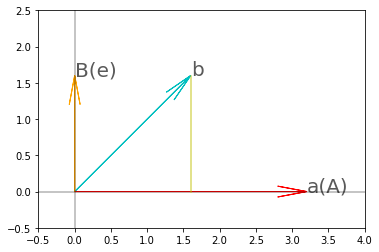

In [16]:
import pylinearalgebra.vistools as vist
xy = vist.XY(x_lim=(-0.5, 4), y_lim=(-0.5, 2.5))
xy.vector((0, 0), (1.6, 1.6), to_text='b', color='c')
xy.vector((0, 0), (3.2, 0), to_text='a(A)', color='r')
xy.line((1.6, 1.6), (1.6, 0), alpha=0.6, color='y')
xy.vector((0, 0), (0, 1.6), to_text='B(e)', color='orange')

**the goal is to find two orthogonal vectors $A, B$ from $a, b$**

then compute the normalized version:

$q_{1} = \frac{A}{||A||}, q_{2} = \frac{B}{||B||}$

Gram's formula:

$A = \frac{a}{||a||}\\
B = b - p = b - A(A^{T} A)^{-1} A^{T} b$

to proof:

$A \perp B = 0$

$A \cdot B \\
= A (b - A(A^{T} A)^{-1} A^{T} b)\\
= A b - A A(A^{T} A)^{-1} A^{T} b\\
= A b - A A I A^{T} b\\
= A b - A b\\
= 0$

### adding a third vector



if $a, b, c$ are indep, what are the orthonormal vectors
$A, B, C$ ?

$C = normalized(c - P_{A} c - P_{B} c)$

**$c$ minus the projections onto $A, B$ respectively. (i.e.
subtract the components of $c$ that are in the direction
of $A, B$)**

### the column space of Q is that of A

to proof, using the simplest $a, b$ example, $B$ is lin-comb of 
$A and b$ which are equivalent to $a, b$



### the matrix form of Gram-Schmidt


just like elimination is formally expressed $A = LU$, 
Gram-Schmidt is expressed as multiplication of matrices:

$A = QR$

using the above vectors $a, b$ example, 

$A = \begin{bmatrix}\\a & b\\ \\ \end{bmatrix}$

and $Q$ is the orthonormal matrix
i.e. vectors $A, B$ that are computed from $a, b$

break down the rows in $Q$ and $R$

$\begin{bmatrix}\\q_{1} & q_{2}\\ \\ \end{bmatrix}
\begin{bmatrix}a_{1}^{T} q_{1} & \dots \\ 
a_{1}^{T} q_{2} & \dots
\end{bmatrix}$

$R$ is a upper triangular matrix because:

$a_{1}^{T} q_{2}$ is 0

to proof: $q_{2} \perp A$ is 0 because $A$ is equivalent to $a$ and
$q_{2} \perp a$

generalize this fact to $R^{n}$ I have

$QR$ where $R$ is a upper-triangular matrix

# Recitation and Exercises

<https://www.youtube.com/watch?v=TRktLuAktBQ>

In [32]:
# Find q1, q2, q3 (orthonormal)
# from a, b, c (columns of A)

# then write A as Q R

import sympy
import pylinearalgebra.mattools as mt

A = sympy.Matrix([
    [1, 2, 4],
    [0, 0, 5],
    [0, 3, 6]
])

# note, I adopted Gilbert's mannerism and used A, B, C for 
# the orthonormal vectors instead of q1, q2, q3...

Ao = sympy.Matrix([1, 0, 0])
b, c = sympy.Matrix([2, 0, 3]), sympy.Matrix([4, 5, 6])

# [0, 0, 1]
Bo = b - (Ao * (Ao.transpose() * Ao).inv() * Ao.transpose()) * b
Bo = Bo.normalized()

# [0, 1, 0]
Co = c - (Ao * (Ao.transpose() * Ao).inv() * Ao.transpose()) * c \
    -(Bo * (Bo.transpose() * Bo).inv() * Bo.transpose()) * c
Co = Co.normalized()

mt.pprint(Bo)
mt.pprint(Co)

Q = sympy.Matrix([
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0]
]).transpose()
mt.pprint(Q)

R = Q.inv() * A 
mt.pprint(R)
Q * R

⎡ 0⎤
⎢ 0⎥
⎣ 1⎦
⎡ 0⎤
⎢ 1⎥
⎣ 0⎦
⎡ 1  0  0 ⎤
⎢ 0  0  1 ⎥
⎣ 0  1  0 ⎦
⎡ 1  2  4 ⎤
⎢ 0  3  6 ⎥
⎣ 0  0  5 ⎦


Matrix([
[1, 2, 4],
[0, 0, 5],
[0, 3, 6]])

In [33]:
# how to compute R

A = [
    [1, 2, 4],
    [0, 0, 5],
    [0, 3, 6],
    #a  b  c
]
Q = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    #q1 q2 q3
]
# R = ???

# lin-comb of the columns!!!!!!!!!

# a = Q . R.col(1) = 1 q1
# b = Q . R.col(2) = 2 q1 + 3 q2 
# c = Q . R.col(3) = 4 q1 + 6 q2 + 5 q3

In [34]:
# Problem 17.1
# orthonormal vectors are automatically linearly indep
# matrix proof:

# show that Qx = 0 implies x = 0, since Q maybe rectangular
# you can use Q.transpose() but not Q.inv()



In [36]:
# QT Q x = 0
# I x = 0
# x = 0

# (must complete the proof) 
# because x = 0, the nullspace of Q is {Z}, and the columns of Q
# are linearly indep

In [39]:
# Problem 17.2

# given the vectors a, b, c listed below, use Gram-Schmidt
# process to find orthogonal vectors A, B, C that span
# the same space

import sympy
a = sympy.Matrix([1, -1, 0, 0])
b = sympy.Matrix([0, 1, -1, 0])
c = sympy.Matrix([0, 0, 1, -1])

# show that {A, B, C} and {a, b, c} are bases for the space
# of vectors perpendicular to d = (1, 1, 1, 1)






In [42]:

import pylinearalgebra.mattools as mt

A = a.normalized()
B = (b - (A * (A.transpose() * A).inv() * A.transpose()) * b).normalized()
C = (b - A * (A.transpose() * A).inv() * A.transpose() * c - B * (B.transpose() * B).inv() * B.transpose() * c).normalized()

mt.pprint(A)
mt.pprint(B)
mt.pprint(C)

⎡  sqrt(2)/2⎤
⎢ -sqrt(2)/2⎥
⎢          0⎥
⎣          0⎦
⎡  sqrt(6)/6⎤
⎢  sqrt(6)/6⎥
⎢ -sqrt(6)/3⎥
⎣          0⎦
⎡    sqrt(42)/42⎤
⎢  2*sqrt(42)/21⎥
⎢ -5*sqrt(42)/42⎥
⎣              0⎦


In [43]:
# Q and {a, b, c} share the same col space therefore
# d = (1, 1, 1, 1) has the same orthogonality to both spaces
# knowing d \perp {a, b, c} (by computing the dot product)
# d \perp Q

# -----------------------------------
# official:
# knowing that (the proof from the previous problem) {A, B, C}
# are linearly indep
# compute the dot product of each column to vector d, (1, 1, 1, 1), and
# conclude that they \perp to d
# since the row space of (1, 1, 1, 1) is 1-D and the number of
# dim of the row space added to the number of dim of the nullsace
# is 4, 
# therefore, {A, B, C} forms a basis for the space of vectors
# \perp to d

